In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df= pd.read_excel(r'C:\Users\admin\Downloads\ANZ synthesised transaction dataset.xlsx') #reading the file
df.columns #print the column names

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [6]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [8]:
df = df[["status", "card_present_flag", "balance", "date", "gender", "age",
    "merchant_suburb", "merchant_state", "amount", "extraction",
    "customer_id", "movement"]] #removing the unwanted columns or use drop function
df["date"] = pd.to_datetime(df["date"])
df

,status,card_present_flag,balance,date,gender,age,merchant_suburb,merchant_state,amount,extraction,customer_id,movement
0,authorized,1.0,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,2018-08-01T01:01:15.000+0000,CUS-2487424745,debit
1,authorized,0.0,21.20,2018-08-01,F,26,Sydney,NSW,14.19,2018-08-01T01:13:45.000+0000,CUS-2487424745,debit
2,authorized,1.0,5.71,2018-08-01,M,38,Sydney,NSW,6.42,2018-08-01T01:26:15.000+0000,CUS-2142601169,debit
3,authorized,1.0,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,2018-08-01T01:38:45.000+0000,CUS-1614226872,debit
4,authorized,1.0,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,2018-08-01T01:51:15.000+0000,CUS-2487424745,debit
...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,14054.14,2018-10-31,F,30,Ringwood,VIC,9.79,2018-10-31T23:09:06.000+0000,CUS-55310383,debit
12039,authorized,1.0,9137.79,2018-10-31,M,20,Casula,NSW,63.87,2018-10-31T23:21:46.000+0000,CUS-2688605418,debit
12040,authorized,1.0,45394.57,2018-10-31,M,28,Kings Park,NSW,43.96,2018-10-31T23:34:25.000+0000,CUS-2663907001,debit
12041,authorized,1.0,11350.67,2018-10-31,M,69,Oakleigh,VIC,30.77,2018-10-31T23:47:05.000+0000,CUS-1388323263,debit


In [9]:
avg= df.groupby(['date']).mean() #mean transaction amount each day
avg

,card_present_flag,balance,age,amount
date,,,,
2018-08-01,0.750000,9933.975328,30.233577,218.014161
2018-08-02,0.858586,13963.617895,31.493421,143.331053
2018-08-03,0.797980,10187.786688,31.751592,242.653376
2018-08-04,0.787234,8206.809407,31.033898,53.356356
2018-08-05,0.739726,13297.525400,29.910000,44.265000
...,...,...,...,...
2018-10-27,0.801980,17025.213741,31.194245,50.155252
2018-10-28,0.772277,15298.837483,30.258741,59.007762
2018-10-29,0.746032,20863.967843,29.460784,377.932745


In [7]:
df['account'].unique() #to check for unique accounts

array(['ACC-1598451071', 'ACC-1222300524', 'ACC-1037050564',
       'ACC-1608363396', 'ACC-2776252858', 'ACC-182446574',
       'ACC-602667573', 'ACC-2171593283', 'ACC-588564840',
       'ACC-1496451953', 'ACC-1903037542', 'ACC-2014856841',
       'ACC-4163822186', 'ACC-3954677887', 'ACC-4258502723',
       'ACC-2890243754', 'ACC-3481401842', 'ACC-2615038700',
       'ACC-966140392', 'ACC-354106658', 'ACC-1443681913',
       'ACC-1710017148', 'ACC-2673069055', 'ACC-3485804958',
       'ACC-3100725361', 'ACC-1990648130', 'ACC-154431271',
       'ACC-3689607373', 'ACC-721712940', 'ACC-1799207998',
       'ACC-2107684084', 'ACC-2173390920', 'ACC-1243371644',
       'ACC-1683215619', 'ACC-2901672282', 'ACC-1652235822',
       'ACC-414431115', 'ACC-1334819143', 'ACC-3541460373',
       'ACC-1650504218', 'ACC-3326339947', 'ACC-3879258709',
       'ACC-2249586092', 'ACC-3827517394', 'ACC-958000567',
       'ACC-2305712452', 'ACC-38923874', 'ACC-819621312',
       'ACC-1973887809', 'ACC-151613

In [10]:
df["customer_id"].value_counts() #total no of transactions made by each customer

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

In [11]:
months = []
for date in df["date"]:
    if date.month == 8:
        months.append("August")
    elif date.month == 9:
        months.append("September")
    elif date.month == 10:
        months.append("October")

df["Months"] = months

In [12]:
df2= df.groupby("date").count() #transaction vol each day
vol= df2["customer_id"].mean()
n=len(df2.index)

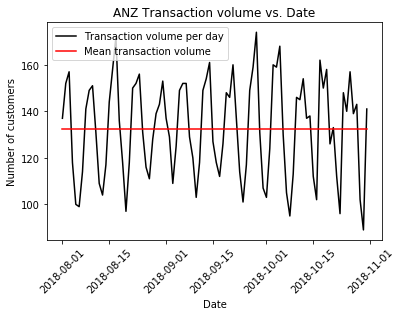

In [28]:
plt.figure()
plt.plot(df2.index, df2["customer_id"], c="black", label="Transaction volume per day")
plt.plot(df2.index, np.linspace(vol, vol, n), c="red", label="Mean transaction volume")
plt.title("ANZ Transaction volume vs. Date")
plt.xticks(rotation = '45')
plt.xlabel("Date")
plt.ylabel("Number of customers")
plt.legend()
plt.show()

In [14]:
df.groupby('Months')['customer_id'].count() #sorting the customer ids based on months

Months
August       3943
October      4087
September    4013
Name: customer_id, dtype: int64

In [15]:
df['Time'] = pd.to_datetime(df['extraction']).dt.time #extract time from timestamp

In [16]:
df['date'].unique()

array(['2018-08-01T00:00:00.000000000', '2018-08-02T00:00:00.000000000',
       '2018-08-03T00:00:00.000000000', '2018-08-04T00:00:00.000000000',
       '2018-08-05T00:00:00.000000000', '2018-08-06T00:00:00.000000000',
       '2018-08-07T00:00:00.000000000', '2018-08-08T00:00:00.000000000',
       '2018-08-09T00:00:00.000000000', '2018-08-10T00:00:00.000000000',
       '2018-08-11T00:00:00.000000000', '2018-08-12T00:00:00.000000000',
       '2018-08-13T00:00:00.000000000', '2018-08-14T00:00:00.000000000',
       '2018-08-15T00:00:00.000000000', '2018-08-17T00:00:00.000000000',
       '2018-08-18T00:00:00.000000000', '2018-08-19T00:00:00.000000000',
       '2018-08-20T00:00:00.000000000', '2018-08-21T00:00:00.000000000',
       '2018-08-22T00:00:00.000000000', '2018-08-23T00:00:00.000000000',
       '2018-08-24T00:00:00.000000000', '2018-08-25T00:00:00.000000000',
       '2018-08-26T00:00:00.000000000', '2018-08-27T00:00:00.000000000',
       '2018-08-28T00:00:00.000000000', '2018-08-29

In [17]:
df['weekday'] = pd.to_datetime(df['extraction']).dt.dayofweek

In [18]:
df['hours'] = pd.to_datetime(df['extraction']).dt.hour

In [19]:
df.apply(set) #displays the different values for each column

status                                            {posted, authorized}
card_present_flag    {0.0, 1.0, nan, nan, nan, nan, nan, nan, nan, ...
balance              {0.25, 262153.86, 16.67, 32785.16, 25.97, 3279...
date                 {2018-08-12 00:00:00, 2018-10-15 00:00:00, 201...
gender                                                          {F, M}
age                  {18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 2...
merchant_suburb      {nan, Brassall, Busby, Clayfield, Healesville,...
merchant_state              {nan, SA, WA, NT, ACT, VIC, TAS, QLD, NSW}
amount               {2.0, 3.25, 4.02, 5.91, 6.66, 7.25, 7.16, 9.25...
extraction           {2018-09-21T11:00:00.000+0000, 2018-10-24T17:1...
customer_id          {CUS-860700529, CUS-2663907001, CUS-2650223890...
movement                                               {debit, credit}
Months                                    {September, October, August}
Time                 {17:14:34, 08:11:42, 21:34:35, 23:50:39, 20:50...
weekda

In [29]:
df['annual']=df.groupby(['customer_id']).amount.transform('sum') #annual transacton made by each customer
df

,status,card_present_flag,balance,date,gender,age,merchant_suburb,merchant_state,amount,extraction,customer_id,movement,Months,Time,weekday,hours,annual
0,authorized,1.0,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,2018-08-01T01:01:15.000+0000,CUS-2487424745,debit,August,01:01:15,2,1,26211.59
1,authorized,0.0,21.20,2018-08-01,F,26,Sydney,NSW,14.19,2018-08-01T01:13:45.000+0000,CUS-2487424745,debit,August,01:13:45,2,1,26211.59
2,authorized,1.0,5.71,2018-08-01,M,38,Sydney,NSW,6.42,2018-08-01T01:26:15.000+0000,CUS-2142601169,debit,August,01:26:15,2,1,23696.45
3,authorized,1.0,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,2018-08-01T01:38:45.000+0000,CUS-1614226872,debit,August,01:38:45,2,1,19286.44
4,authorized,1.0,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,2018-08-01T01:51:15.000+0000,CUS-2487424745,debit,August,01:51:15,2,1,26211.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,14054.14,2018-10-31,F,30,Ringwood,VIC,9.79,2018-10-31T23:09:06.000+0000,CUS-55310383,debit,October,23:09:06,2,23,28367.16
12039,authorized,1.0,9137.79,2018-10-31,M,20,Casula,NSW,63.87,2018-10-31T23:21:46.000+0000,CUS-2688605418,debit,October,23:21:46,2,23,20550.24
12040,authorized,1.0,45394.57,2018-10-31,M,28,Kings Park,NSW,43.96,2018-10-31T23:34:25.000+0000,CUS-2663907001,debit,October,23:34:25,2,23,33459.56
12041,authorized,1.0,11350.67,2018-10-31,M,69,Oakleigh,VIC,30.77,2018-10-31T23:47:05.000+0000,CUS-1388323263,debit,October,23:47:05,2,23,18680.22


In [21]:
df['annual'].corr(df['age']) #determine the correlation between annual and age

-0.004523180490781303

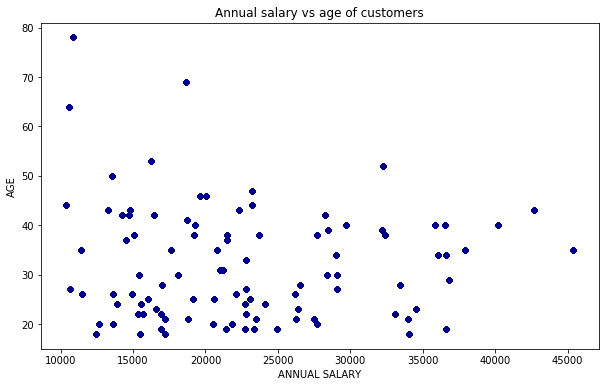

In [30]:
df.plot(kind='scatter', x='annual', y='age', figsize=(10, 6), color='darkblue')

plt.title('Annual salary vs age of customers')
plt.ylabel('AGE')
plt.xlabel('ANNUAL SALARY')

plt.show()

In [31]:
df.groupby(['customer_id','Months']).amount.sum() #amount made by each customer every month

customer_id     Months   
CUS-1005756958  August        6139.40
                October       5466.35
                September     4663.22
CUS-1117979751  August        8703.30
                October      12023.46
                               ...   
CUS-880898248   October       3756.55
                September     3408.41
CUS-883482547   August       10763.36
                October      14038.11
                September    11837.94
Name: amount, Length: 300, dtype: float64